# 𝗔𝗻𝗮𝗹𝘆𝘀𝗶𝘀 of 𝐒𝐮𝐢𝐜𝐢𝐝𝐞  𝐢𝐧 𝐈𝐧𝐝𝐢𝐚: 𝐖𝐡𝐨, 𝐖𝐡𝐲, 𝐚𝐧𝐝 𝐇𝐨𝐰?

### Introduction / Background

Close to 800 000 people die due to suicide every year, which is one person every 40 seconds. Many more attempt suicide. Suicide occurs throughout the lifespan and is the second leading cause of death among 15-29 year olds globally.


So the question occurs what can be done to reduce the suicidal rate or attempts?

In [1]:
import pandas as pd
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")

current_palette = sns.color_palette()
sns.set(font_scale=1.5) 
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Suicides in India 2001-2012.csv')
meansDf = df[df['Type_code']=='Means_adopted']

## Gender analysis

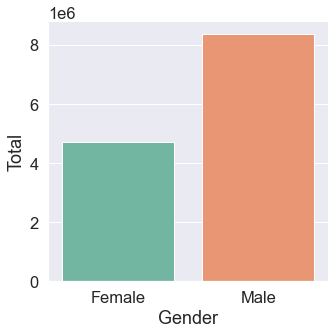

In [3]:
filter_gender = pd.DataFrame(df.groupby("Gender")["Total"].sum()).reset_index()
sns.catplot(x="Gender", y="Total", kind="bar", data=filter_gender,palette="Set2");

## State wise analysis

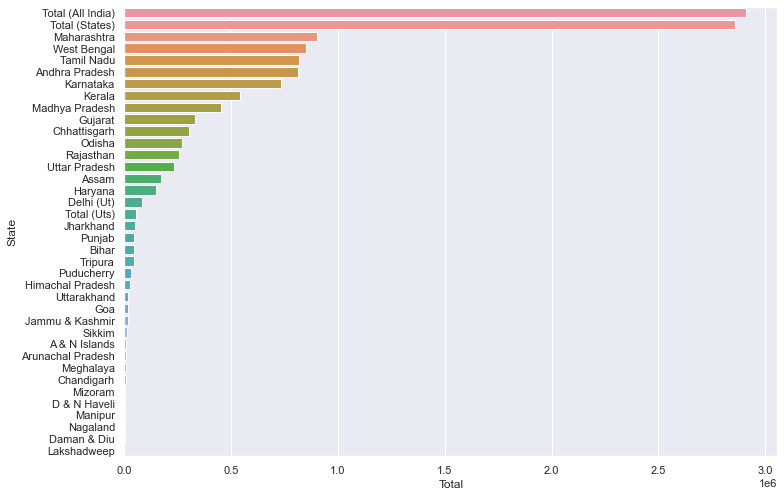

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
filter_state = pd.DataFrame(df.groupby(["State"])["Total"].sum().sort_values(ascending=False)).reset_index()
sns.barplot(y = 'State', x = 'Total',data = filter_state, edgecolor = 'w')
plt.show()

Highest no. of suicide cases occur in Maharashtra, West Bengal, and Tamil Nadu.

## Year wise analysis:

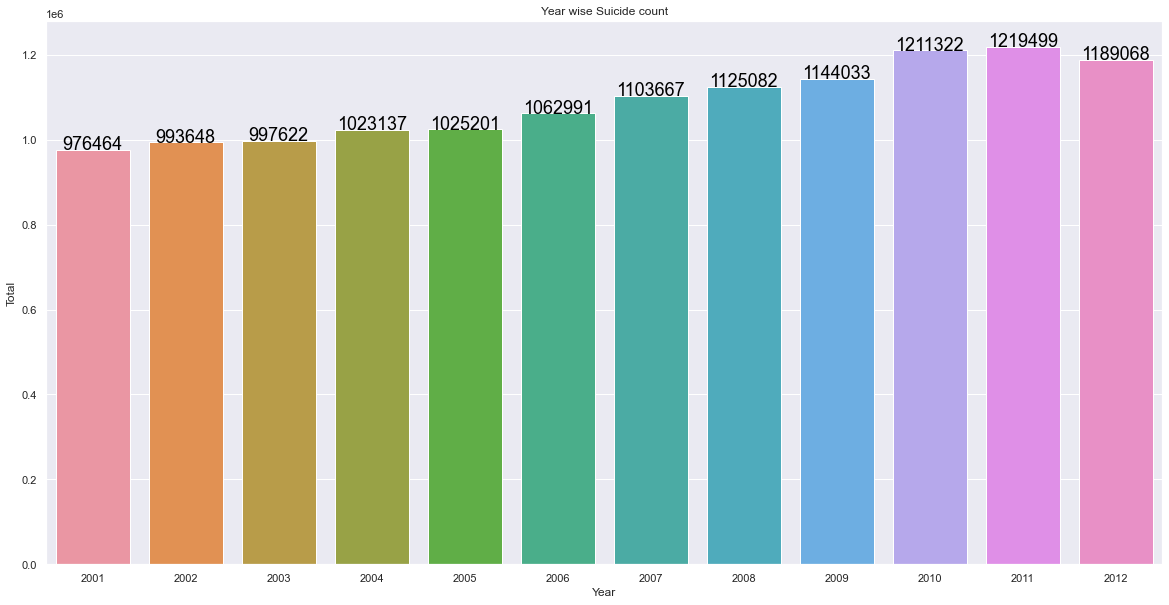

In [5]:
# column Total is number of suicides . 
# Yearwise sucides. 
yearwise= df[['Year', 'Total']].groupby('Year').sum()
yearwise.reset_index(inplace = True)
#yearwise
plt.rcParams.update({'font.size': 18})
plt.figure(figsize= (20,10)) # Make a plot size
trace = sns.barplot(x = yearwise['Year'], y = yearwise['Total'], data = yearwise)
# Adding values on the top of the bars
for index, row in yearwise.iterrows():
    trace.text(x = row.name, y = row.Total, s = str(row.Total),color='black', ha="center")
plt.title('Year wise Suicide count')    
plt.show()

From Year 2001 to 2011 sucides rate is increased by 24.76% .

### Age group

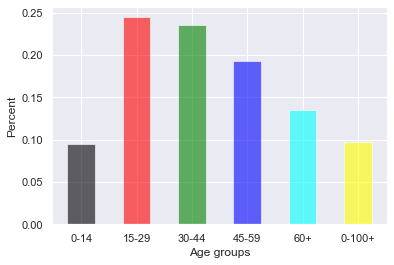

In [6]:
new_df = df[df['Total']>0]
age_cnt = dict(new_df['Age_group'].value_counts())
tot = sum(list(age_cnt.values()))
# Percentage of suicides per age group
age_perc = {k:float(v)/tot for k,v in age_cnt.items()}

key_set = ['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'] 
age_grps = [age_perc[k] for k in key_set]
X = arange(len(age_grps))
fig = figure(figsize=(6, 4))

bar(X, age_grps, align='center', color=['black', 'red', 'green', 'blue', 'cyan','yellow'],width=0.5, alpha=0.6)
xticks(X, key_set)

xlabel('Age groups')
ylabel('Percent')
show()

From the below visualization it is clear that youngsters (15-29 age) and middle age (30-44) tend to commit the maximum number of suicides.

It can be due to several reasons like:

- unemployment
- academic stress
- bad friend circle
- farmers (since they have to be young and strong enough to do farming)
- addictions

## Data pre-processing

In [7]:
type_dict = {k:list(v) for k,v in df.groupby('Type_code')['Type']} 


In [8]:
type_dict = {k:list(v) for k,v in df.groupby('Type_code')['Type']} 
educ_uniq = set(type_dict['Education_Status'])
print('Categories in Education_Status', educ_uniq)
educ_level_df = df[df['Type'].isin(educ_uniq)]

Categories in Education_Status {'Primary', 'Matriculate/Secondary', 'Middle', 'Hr. Secondary/Intermediate/Pre-Universit', 'Graduate', 'Diploma', 'Post Graduate and Above', 'No Education'}


In [9]:
soc_uniq = set(type_dict['Social_Status'])
soc_stat_df = df[df['Type'].isin(soc_uniq)]

prof_uniq = set(type_dict['Professional_Profile'])
prof_stat_df = df[df['Type'].isin(prof_uniq)]

means_uniq = set(type_dict['Means_adopted'])
means_df = df[df['Type'].isin(means_uniq)]
print('Categories in Means_adopted:', means_uniq)

Categories in Means_adopted: {'By Consuming Insecticides', 'By touching electric wires', 'By Jumping from (Building)', 'By Other means (please specify)', 'By Machine', 'By Jumping off Moving Vehicles/Trains', 'By Fire/Self Immolation', 'By Over Alcoholism', 'By Consuming Other Poison', 'By Hanging', 'By coming under running vehicles/trains', 'By Overdose of sleeping pills', 'By Jumping from (Other sites)', 'By Self Infliction of injury', 'By Drowning', 'By Fire-Arms', 'By Other means'}


In [10]:
def replace_similar_types(col, similar_pairs):
    '''
    Function gets a list of simiar_pair and replaces the 2nd one with the first
    '''
    for sim in list(similar_pairs):
        if col == sim[1]:
            col = sim[0]
    return col

In [11]:
# list of tuples that need to be replaced
sim_means = [('By Other means', 'By Other means (please specify)')]

In [12]:
means_df.is_copy = False
means_df['Type'] = means_df['Type'].apply(lambda l: replace_similar_types(l,sim_means))

## Education level

In [13]:
educ_level_df=educ_level_df.sort_values(by='Total',ascending=False)

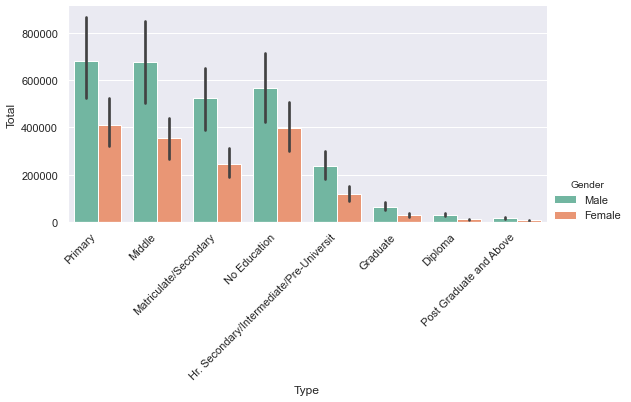

In [14]:
# plot color coded by __Gender__
plot = sns.factorplot(x='Type', y='Total', hue='Gender', kind='bar',\
                      data=educ_level_df, palette=sns.color_palette("Set2"),\
                      estimator=sum, size=4, aspect=2)
plot.set_xticklabels(rotation=45, horizontalalignment='right');

It appears that people with low education tend to commit more suicide.

People with Diploma and Graduate tend to commit least no. of suicide

## Social Status

In [15]:
soc_stat_df= soc_stat_df.sort_values(by='Total',ascending=False)

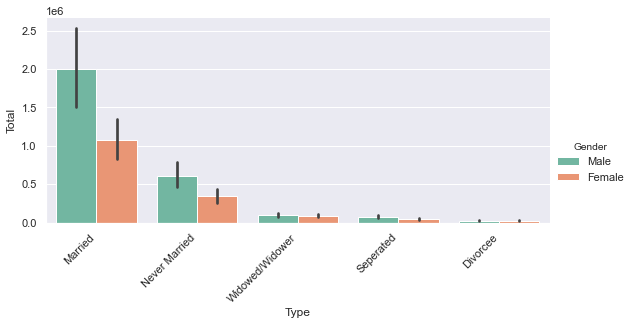

In [16]:
# color by gender
plot = sns.factorplot(x='Type', y='Total', hue ='Gender', kind='bar',\
                      data=soc_stat_df, palette=sns.color_palette("Set2"),\
                      estimator=sum, size=4, aspect=2)
plot.set_xticklabels(rotation=45, horizontalalignment='right');

It appears that married people count for the majority of suicide cases.

## Profession of people

In [17]:
prof_stat_df= prof_stat_df.sort_values(by='Total',ascending=False)

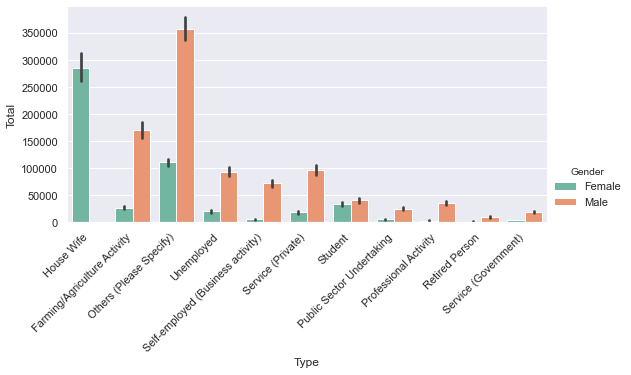

In [18]:
plot = sns.factorplot(x='Type', y='Total', hue ='Gender', kind='bar',\
                      data=prof_stat_df, palette=sns.color_palette("Set2"),\
                      estimator=sum, size=4, aspect=2)
plot.set_xticklabels(rotation=45, horizontalalignment='right');

Farmers and housewives tend to commit more suicide compared to others.

This makes sense because most of the Indian farmers have debt and their life depends on the yield of their crops, if the yield is not good then they will not be able to clear their debt and in the worst case they might commit suicide.Housewives might have issues in their marriage which this might be a reason for such a high number of cases.

## Cause category

In [19]:
#Category correction 
causes = df[df['Type_code'] == 'Causes']
pd.options.mode.chained_assignment = None
causes.loc[causes['Type']=='Bankruptcy or Sudden change in Economic Status', 'Type'] = 'Bankruptcy'
causes.loc[causes['Type']=='Bankruptcy or Sudden change in Economic', 'Type'] = 'Bankruptcy'
causes.loc[causes['Type']=='Causes Not known', 'Type'] = 'Unknown'
causes.loc[causes['Type']=='Other Causes (Please Specity)', 'Type'] = 'Unknown'
causes.loc[causes['Type']=='Not having Children(Barrenness/Impotency', 'Type'] = 'Infertility'
causes.loc[causes['Type']=='Not having Children (Barrenness/Impotency', 'Type'] = 'Infertility'

In [21]:
causes=causes[causes.Type!='Unknown']

In [22]:
causes= causes.sort_values(by='Total',ascending=False)

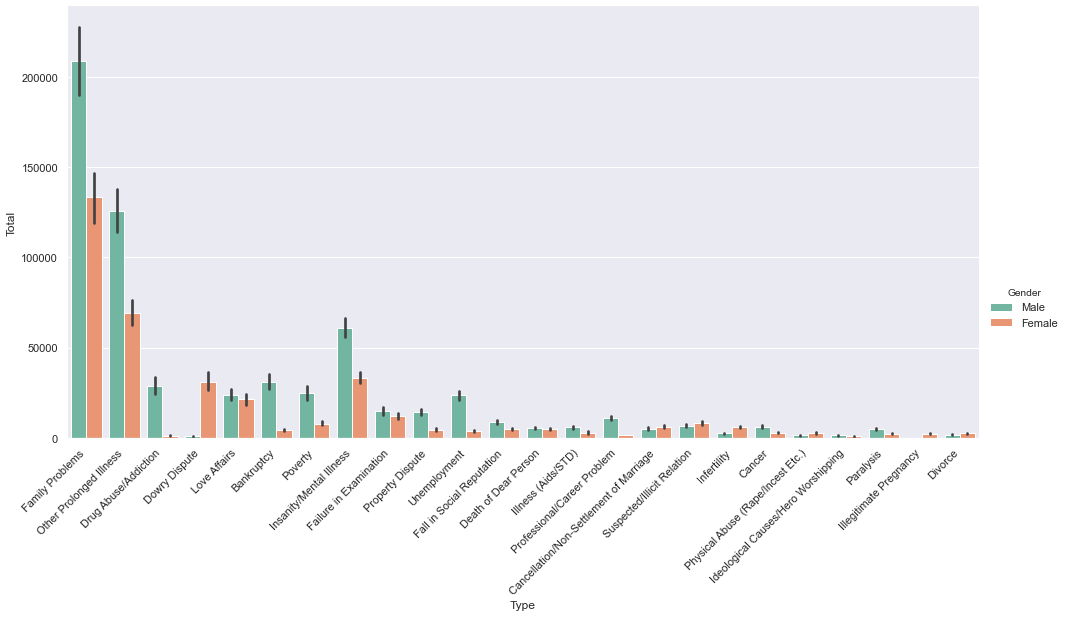

In [23]:
plot = sns.factorplot(x='Type', y='Total', hue='Gender', kind='bar',\
                      data=causes, palette=sns.color_palette("Set2"),\
                      estimator=sum ,size=7, aspect=2)
plot.set_xticklabels(rotation=45, horizontalalignment='right');


The leading cause of suicide is the Family problem, which is in line with the observation of that married groups are more likely to commit suicide, followed by Prolonged illness and Insanity/Mental Ilness.The only difference between males and females on in the order of types of suicide causes is on "Dowry Dispute", Suspected/Illicit Relation and Cancellation/None-Settlement of Marriage where female suicide has a higher rate.

## Means of commiting suicide:

In [24]:
means_df = means_df.sort_values(by='Total',ascending=False)

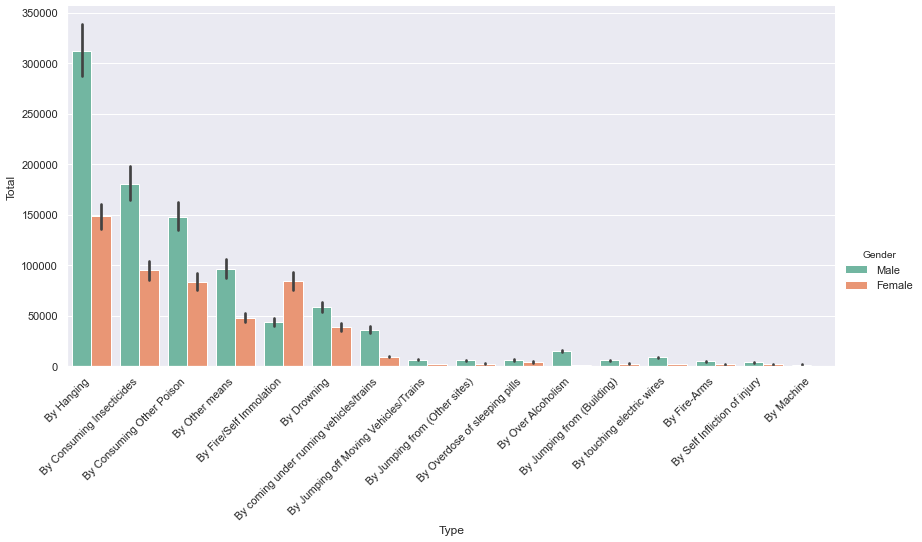

In [25]:
plot = sns.factorplot(x='Type', y='Total',  hue="Gender", kind='bar',\
                      data=means_df, estimator=sum, palette=sns.color_palette("Set2"), size=6, aspect=2)
plot.set_xticklabels(rotation=45, horizontalalignment='right');


## Age wise suicide cause analysis:

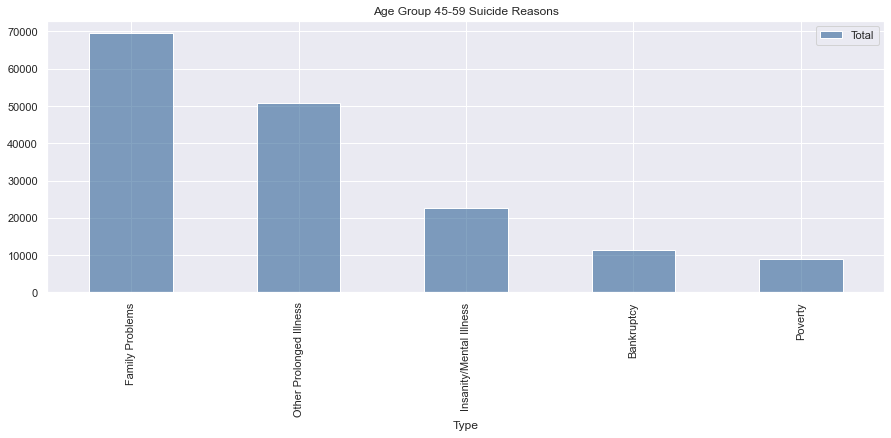

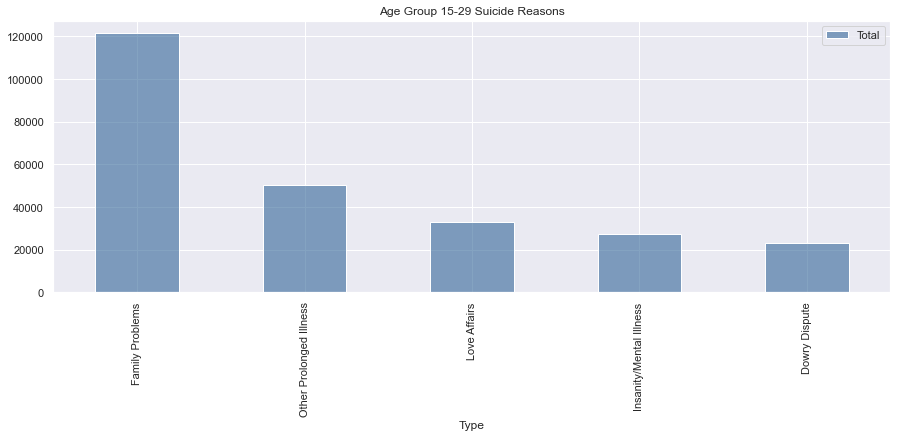

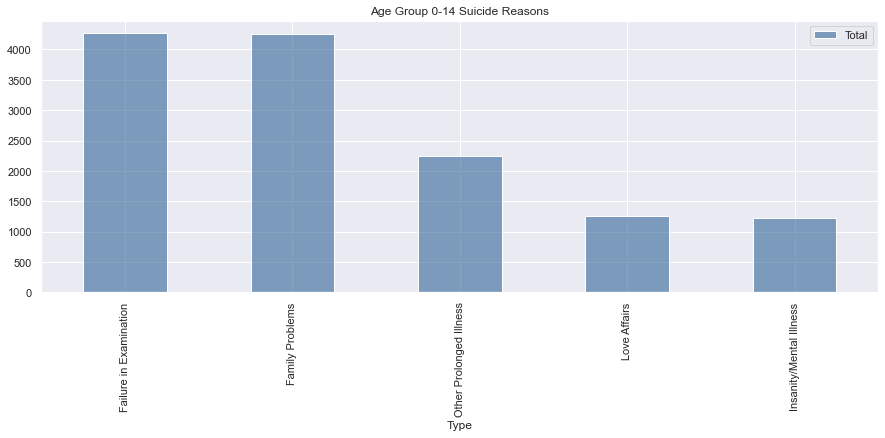

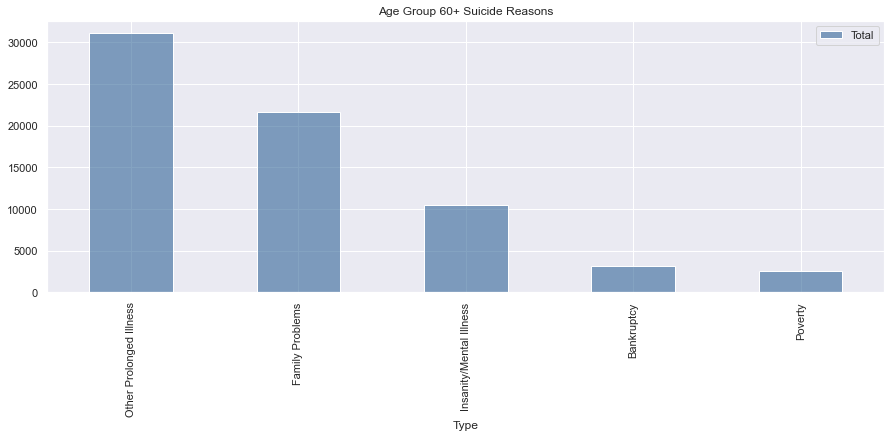

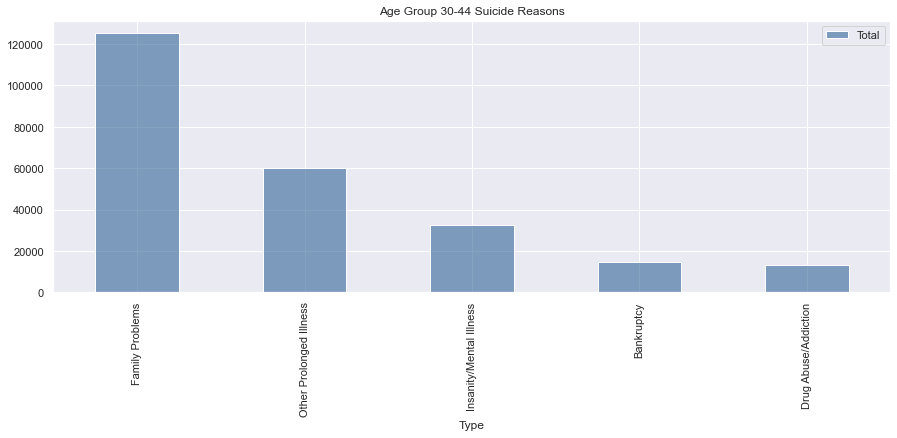

In [26]:
age_set = causes[['Type','Age_group','Total']]
age_grp = causes['Age_group'].value_counts().index
age_grp = list(age_grp)
for x in age_grp:
    group_set = age_set[age_set['Age_group'] == x ]
    group_set =group_set.groupby('Type').sum().sort_values('Total', ascending = False)
    group_set = group_set.head(5)
    group_set.plot(kind = 'bar', figsize = (15,5), title = 'Age Group '+x+ ' Suicide Reasons',\
                   color=(0.2, 0.4, 0.6, 0.6))
    plt.show()

## From top 5 Reasons of each age group the following observation were drawn:

1. Age group 0-14, failure in examination was one of the top reasons
2. Age group 15-29, family problems and love affairs are one of the top reasons
3. Age group 30-44 and 45-59 have Family problems as one the top reasons, followed by reasons liked mental illness and bankruptcy.
4. Prolonged illness is the strongest reason for age group Age 60+.
5. Family Problems is the strongest reason in all the age groups.
6. In general, illness is appearing as the strongest reason irrespective of age group and gender


## Age wise suicide method analysis:

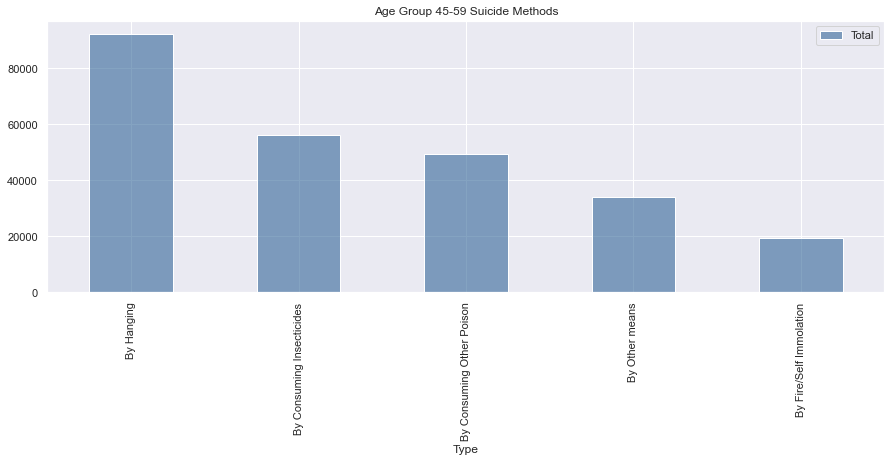

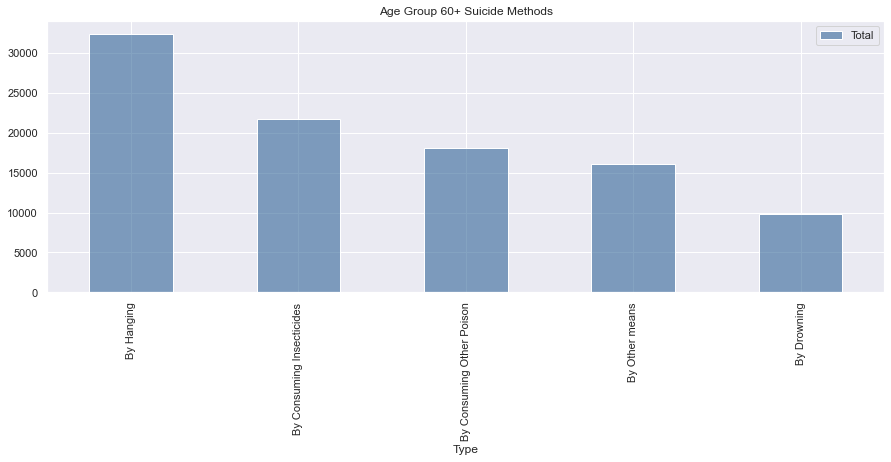

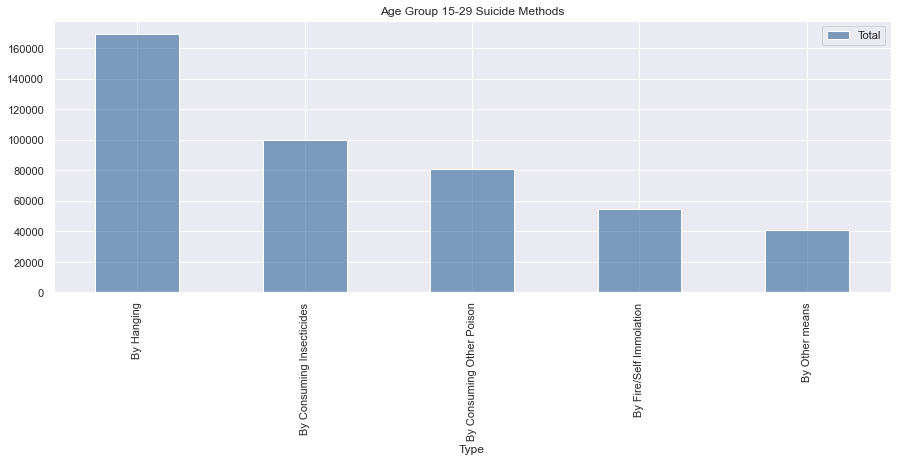

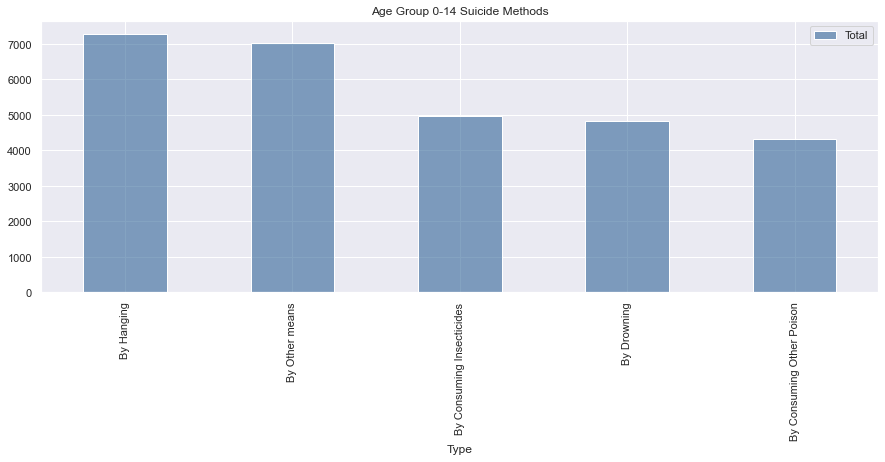

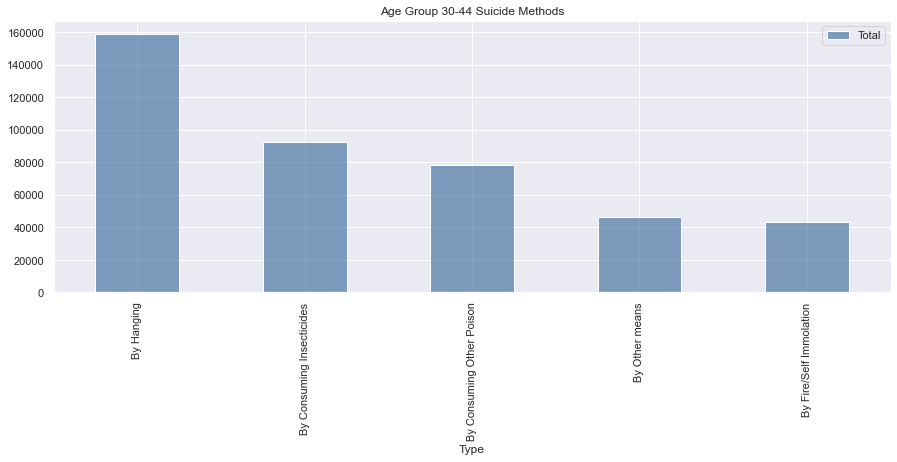

In [27]:
age_set = means_df[['Type','Age_group','Total']]
age_grp = means_df['Age_group'].value_counts().index
age_grp = list(age_grp)
for x in age_grp:
    group_set = age_set[age_set['Age_group'] == x ]
    group_set =group_set.groupby('Type').sum().sort_values('Total', ascending = False)
    group_set = group_set.head(5)
    group_set.plot(kind = 'bar', figsize = (15,5), title = 'Age Group '+x+ ' Suicide Methods',\
                   color=(0.2, 0.4, 0.6, 0.6))
    plt.show()

### Suicide by Hanging Is a Priority for Suicide Prevention

In [28]:
suicide_by_hanging_insecticde= df[(df.Type=='By Hanging') | (df.Type=='By Consuming Insecticides')]

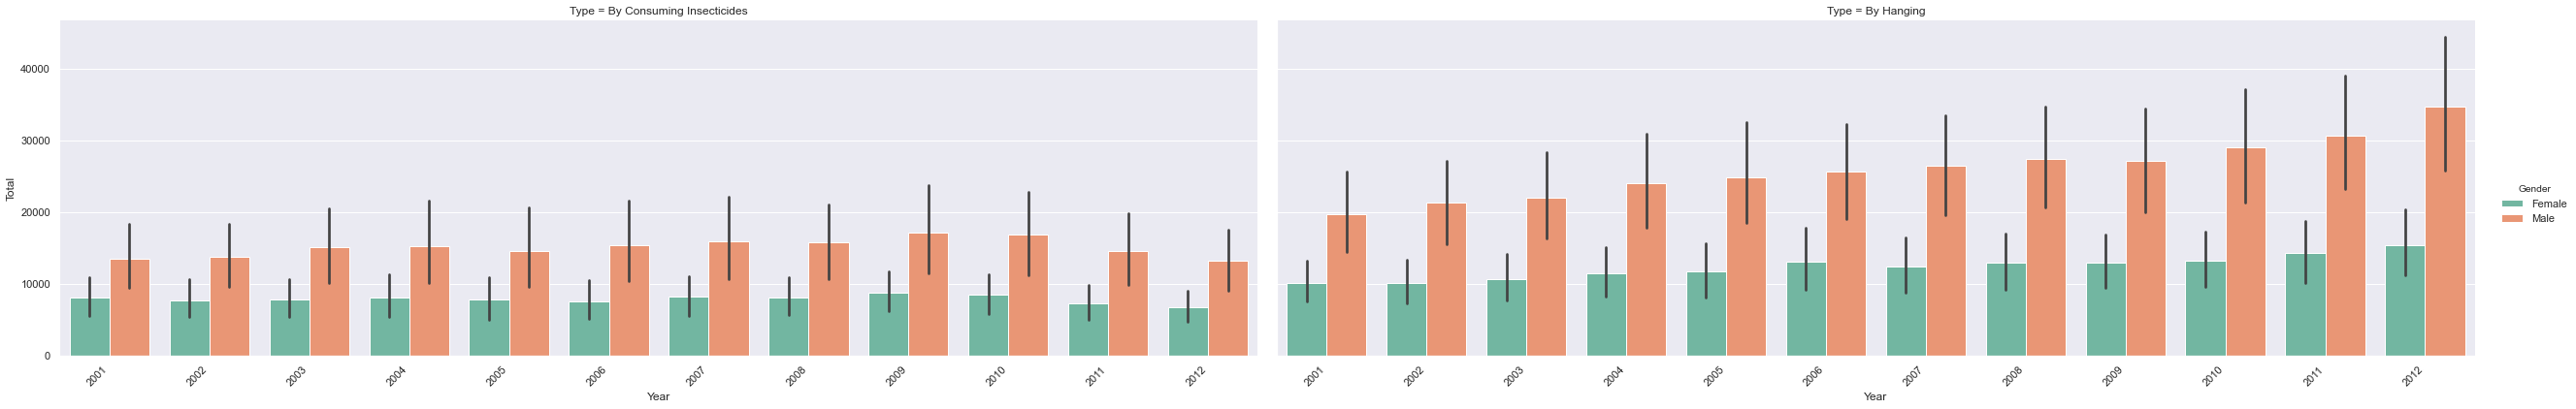

In [29]:
plot = sns.factorplot(x='Year', y='Total',  hue="Gender", col="Type",kind='bar',\
                      data=suicide_by_hanging_insecticde, estimator=sum, palette=sns.color_palette("Set2"), size=6, aspect=3)
plot.set_xticklabels(rotation=45, horizontalalignment='right');



Suicide by hanging increased by 56% (from 3.9 to 6.1 per 100,000) among males and by 24% (from 2.1 to 2.6 per 100,000) among females over the study period while incidence of insecticide poisoning decreased by 44% (from 2.7 to 1.5 per 100,000) among males and by 52% (from 1.7 to 0.8 per 100,000) among females.

## What can be done to help reduce suicidal rate in male gender? 
- Male were raised in a manner where they have to act tough and hide their emotions. 
- Family members and friends have to show their support no matter if its female or male to share what they going through and encourage them to share their emotions. 
- On top of that, Government also should campaign to support citizens to reach out for help from each others and provide therapist to those that are actually in need which can help them come up with solutions that can be dealt with their mental illness. 
- It doesn't only have to be some depression kind of illness but also people who are going through stress out can seek out for solution to deal with it. 
- As for students who gets bullied at school, should seek help from their parents, in addition they can go see school council to complain. School should also support by taking a strict actions against those students who bully so, in the future students will think twice before bullying anyone.



## Conclusion: 

1.  Males were predominantly affected.
2.  From Year 2001 to 2011 sucides rate is increased by 24.76% .
3.  People who commit suicide are mostly:
       - Married
       - Farmers and housewives
       - Youngsters (15-29 age) and middle age (30-44)
4.  Highest no. of suicide cases occur in Maharashtra, West Bengal, and Tamil Nadu.
5.  Most favored method of suicide amongst males and females was hanging followed by poisoning. 
6.  Male dominance was apparent for each method of suicide except for self-immolation. 
7.  Males were relatively more likely to use hanging and poisoning while females were more likely to prefer drowning and self-immolation as methods of suicide. 
8.  Among females, significantly younger females resorted to hanging when compared to older females who preferred drowning.

#### These data provide a range of information to identify vulnerable groups, to formulate appropriate suicide prevention strategies. For hanging, limiting fictional portrayals of this method may be useful areas for prevention. Further restrictions on production and sales of highly hazardous pesticides may also help with further reductions in suicide by pesticide poisoning.